# Project: Investigate a Dataset (TMDB Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> ### In this project we will analyze data from the TMDB Movies Dataset This data set contains information about 10,000 movies collected from The Movie Database (TMDb) including user ratings and revenue

> **Based in the content of this dataset we can ask questions like:**
> <ol>
> <li>What are the top 10 movies in terms of revenues, popularity, and ratings?</li>
> <li>What are the largest years with revenues?</li>
> <li>What are the top genres associated with revenues, popularity, budget, and ratings?</li>
> <li>What is the average runtime of the movies?</li>
> <li>What kinds of properties are associated with movies that have high revenues?</li>
> </ol>
>

In [1]:
# importing necessary packages for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis

### General Properties
>Firt we will check the dataset

In [2]:
# Load the data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# number of columns and rows
df.shape

(10866, 21)

In [4]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# check for NaNs
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

1

we have found many missing values and one duplicate row

In [7]:
# check some statistics for the data
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

Budget and revenue columns have a lot of zero values

> ### some observations after checking the dataset:
> <ol>
> <li>Some columns are unnecessary for answering our questions so it will be dropped</li>
> <li>There is one duplicate row so it will be dropped</li>    
> <li>Few null values in the genres column we will remove it</li>
> <li>Budget and revenue columns have a lot of zero values we will remove it if we replace it with the mean value it will be imprecise also with the runtime column will we drop the few zero values</li>
> </ol>
>

## Data Cleaning

In [8]:
# drop unnecessary columns
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj', 'keywords'], axis=1, inplace=True)
df.head()

popularity     budget     revenue                original_title  runtime  \
0   32.985763  150000000  1513528810                Jurassic World      124   
1   28.419936  150000000   378436354            Mad Max: Fury Road      120   
2   13.112507  110000000   295238201                     Insurgent      119   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens      136   
4    9.335014  190000000  1506249360                     Furious 7      137   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   
1  Action|Adventure|Science Fiction|Thriller        6185           7.1   
2         Adventure|Science Fiction|Thriller        2480           6.3   
3   Action|Adventure|Science Fiction|Fantasy        5292           7.5   
4                      Action|Crime|Thriller        2947           7.3   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015

In [9]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
# check for duplicates
df.duplicated().sum()

0

In [11]:
# replace 0 values with NaN
df = df.replace(0, np.nan)
# drop all NaNs 
df.dropna(inplace=True)

In [12]:
# check for NaNs
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [13]:
# check for zero values
df.describe()

popularity        budget       revenue      runtime   vote_count  \
count  3854.000000  3.854000e+03  3.854000e+03  3854.000000  3854.000000   
mean      1.191554  3.720370e+07  1.076866e+08   109.220291   527.720291   
std       1.475162  4.220822e+07  1.765393e+08    19.922820   879.956821   
min       0.001117  1.000000e+00  2.000000e+00    15.000000    10.000000   
25%       0.462368  1.000000e+07  1.360003e+07    95.000000    71.000000   
50%       0.797511  2.400000e+07  4.480000e+07   106.000000   204.000000   
75%       1.368324  5.000000e+07  1.242125e+08   119.000000   580.000000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000  9767.000000   

       vote_average  release_year  
count   3854.000000   3854.000000  
mean       6.168163   2001.261028  
std        0.794920     11.282575  
min        2.200000   1960.000000  
25%        5.700000   1995.000000  
50%        6.200000   2004.000000  
75%        6.700000   2010.000000  
max        8.400000   2015.000000

> #### now all things look right we cleaned the data from duplicates and NaNs and dropped unnecessary columns

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will explor the dataset and answer the questions that we asked in the first section and visualize it


#### we will explor the data first

### we will create histograms for more understanding of the data

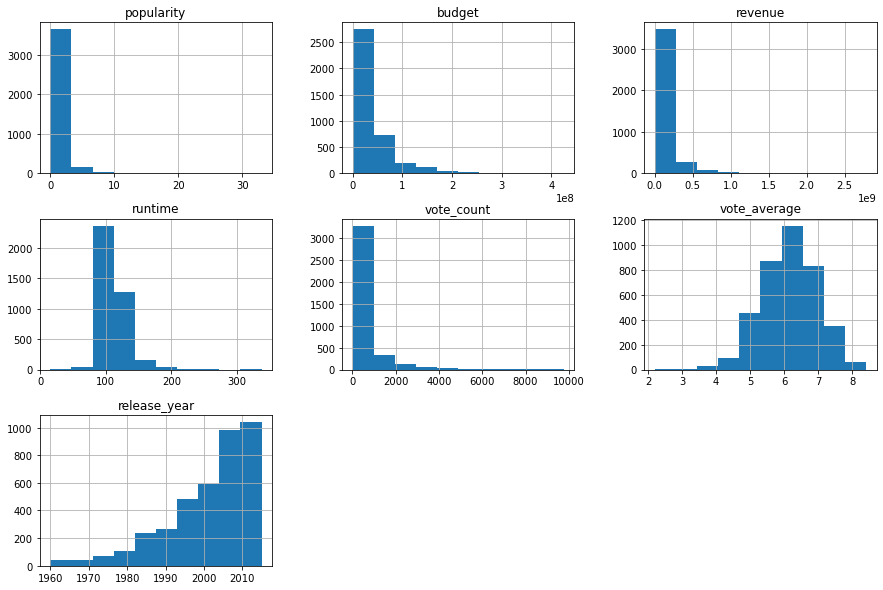

In [14]:
# histograms for all the numeric variable
df.hist(figsize=(15,10));

>  ### release year data show that the majority of the movies in this dataset were produced after 2000

### We will create scatter plots that show us the correlation between revenue and budget, and revenue and popularity 

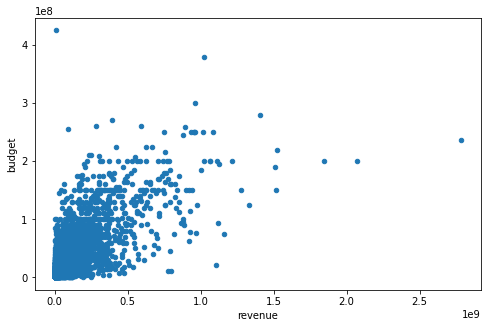

In [15]:
# correlation between revenue and budget
df.plot(x='revenue', y='budget', kind='scatter', figsize=(8,5));

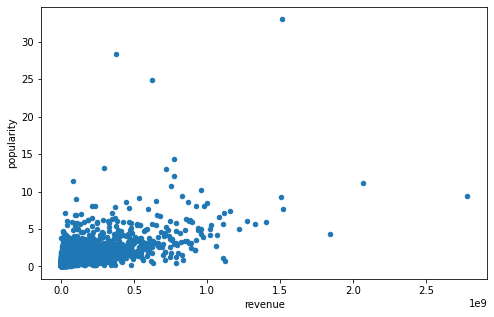

In [16]:
# correlation between revenue and popularity
df.plot(x='revenue', y='popularity', kind='scatter', figsize=(8,5));

> ### revenue has a slight correlation with budget and weak correlation with popularity

#### now we will answer our questions
### Research Question 1 (What are the top 10 movies in terms of revenues, popularity and ratings?)
### 1.Top 10 movies in term of popularity

### Getting all the data about the top movies in term of revenues

In [18]:
# we will get the top 10 movies term of revenues
df.nlargest(10, 'revenue')

popularity       budget       revenue  \
1386    9.432768  237000000.0  2.781506e+09   
3      11.173104  200000000.0  2.068178e+09   
5231    4.355219  200000000.0  1.845034e+09   
4361    7.637767  220000000.0  1.519558e+09   
0      32.985763  150000000.0  1.513529e+09   
4       9.335014  190000000.0  1.506249e+09   
14      5.944927  280000000.0  1.405036e+09   
3374    5.711315  125000000.0  1.327818e+09   
5422    6.112766  150000000.0  1.274219e+09   
5425    4.946136  200000000.0  1.215440e+09   

                                    original_title  runtime  \
1386                                        Avatar    162.0   
3                     Star Wars: The Force Awakens    136.0   
5231                                       Titanic    194.0   
4361                                  The Avengers    143.0   
0                                   Jurassic World    124.0   
4                                        Furious 7    137.0   
14                         Avengers: Age of Ultron    141.0   
3374  Harry Potter and the Deathly Hallows: Part 2    130.0   
5422                                        Frozen    102.0   
5425                                    Iron Man 3    130.0   

                                         genres  vote_count  vote_average  \
1386   Action|Adventure|Fantasy|Science Fiction        8458           7.1   
3      Action|Adventure|Science Fiction|Fantasy        5292           7.5   
5231                     Drama|Romance|Thriller        4654           7.3   
4361           Science Fiction|Action|Adventure        8903           7.3   
0     Action|Adventure|Science Fiction|Thriller        5562           6.5   
4                         Action|Crime|Thriller        2947           7.3   
14             Action|Adventure|Science Fiction        4304           7.4   
3374                   Adventure|Family|Fantasy        3750           7.7   
5422                 Animation|Adventure|Family        3369           7.5   
5425           Action|Adventure|Science Fiction        6882           6.9   

      release_year  
1386          2009  
3             2015  
5231          1997  
4361          2012  
0             2015  
4             2015  
14            2015  
3374          2011  
5422          2013  
5425          2013

### Now we will create a graph showing us the top 10 movies in term of revenues

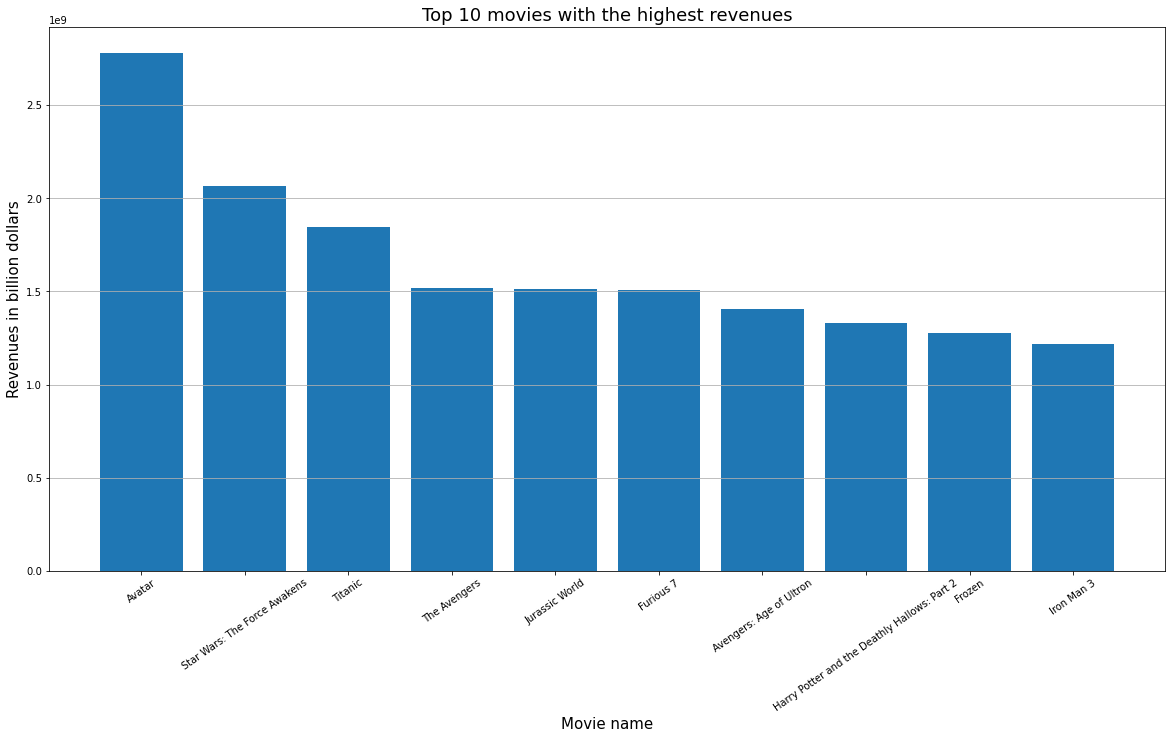

In [19]:
# now we creat visualization
plt.subplots(figsize=(20, 10))
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.bar(df.nlargest(10, 'revenue')['original_title'].values, df.nlargest(10, 'revenue')['revenue'].values)
plt.title('Top 10 movies with the highest revenues', fontsize=18)
plt.xlabel('Movie name',fontsize=15)
plt.ylabel('Revenues in billion dollars', fontsize=15);

> ### Avatar holding first place with the highest revenues 2.781506e+09 

### 2.Top 10 movies in term of popularity

### Getting all the data about the top movies in term of popularity

In [20]:
# we will get the top 10 movies term of popularity
df.nlargest(10, 'popularity')

popularity       budget       revenue  \
0      32.985763  150000000.0  1.513529e+09   
1      28.419936  150000000.0  3.784364e+08   
629    24.949134  165000000.0  6.217525e+08   
630    14.311205  170000000.0  7.733124e+08   
2      13.112507  110000000.0  2.952382e+08   
631    12.971027  170000000.0  7.147666e+08   
1329   12.037933   11000000.0  7.753980e+08   
632    11.422751   20000000.0  7.873990e+07   
3      11.173104  200000000.0  2.068178e+09   
633    10.739009  125000000.0  7.521002e+08   

                             original_title  runtime  \
0                            Jurassic World    124.0   
1                        Mad Max: Fury Road    120.0   
629                            Interstellar    169.0   
630                 Guardians of the Galaxy    121.0   
2                                 Insurgent    119.0   
631     Captain America: The Winter Soldier    136.0   
1329                              Star Wars    121.0   
632                               John Wick    101.0   
3              Star Wars: The Force Awakens    136.0   
633   The Hunger Games: Mockingjay - Part 1    123.0   

                                         genres  vote_count  vote_average  \
0     Action|Adventure|Science Fiction|Thriller        5562           6.5   
1     Action|Adventure|Science Fiction|Thriller        6185           7.1   
629             Adventure|Drama|Science Fiction        6498           8.0   
630            Action|Science Fiction|Adventure        5612           7.9   
2            Adventure|Science Fiction|Thriller        2480           6.3   
631            Action|Adventure|Science Fiction        3848           7.6   
1329           Adventure|Action|Science Fiction        4428           7.9   
632                             Action|Thriller        2712           7.0   
3      Action|Adventure|Science Fiction|Fantasy        5292           7.5   
633          Science Fiction|Adventure|Thriller        3590           6.6   

      release_year  
0             2015  
1             2015  
629           2014  
630           2014  
2             2015  
631           2014  
1329          1977  
632           2014  
3             2015  
633           2014

### Now we will create a graph showing us the top 10 movies in term of popularity

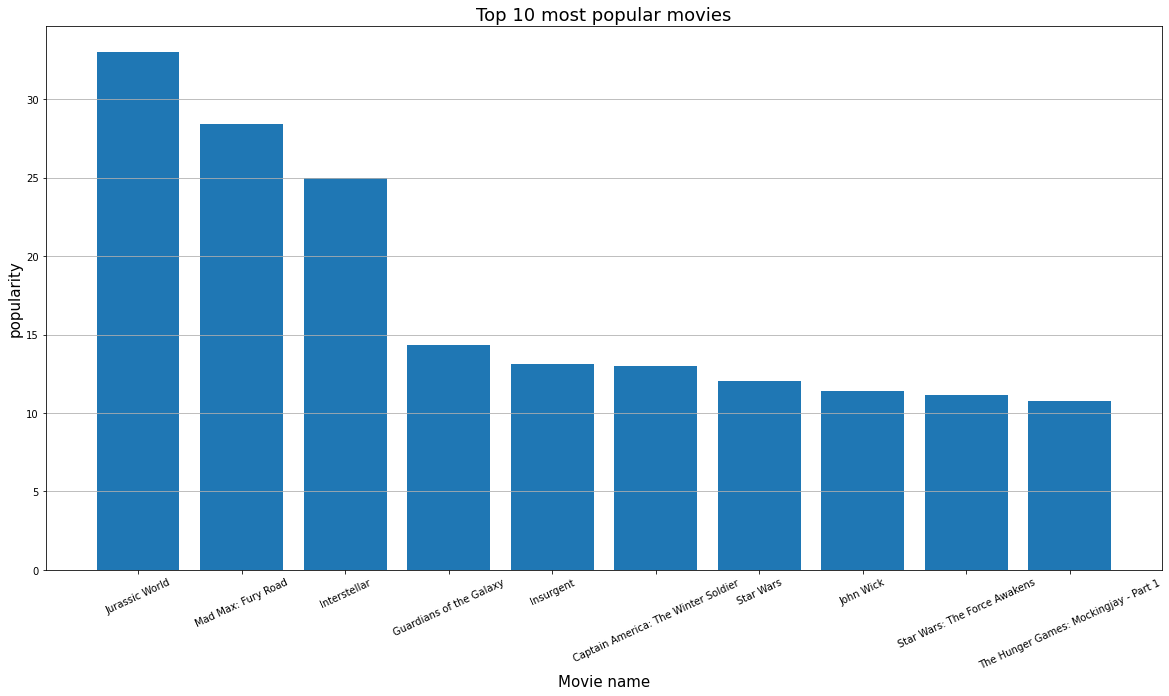

In [21]:
# now we creat visualization
plt.subplots(figsize=(20, 10))
plt.xticks(rotation=25)
plt.grid(axis='y')
plt.bar(df.nlargest(10, 'popularity')['original_title'].values, df.nlargest(10, 'popularity')['popularity'].values)
plt.title('Top 10 most popular movies', fontsize=18)
plt.xlabel('Movie name',fontsize=15)
plt.ylabel('popularity', fontsize=15);

> ### Jurassic World is the most popular movie with poularity of 32.985763

### 3.Top 10 movies in term of ratings
> will get the highest ratings in the condition that the vote count is above the average to be more precise

In [22]:
# average of the vote count
df['vote_count'].mean()

527.7202906071614

### Getting all the data about the top movies in term of ratings

In [23]:
# we will get the top 10 movies term of ratings
df.nlargest(10, 'vote_average').query('vote_count >= 528') 

popularity       budget       revenue            original_title  \
4178     7.192039   25000000.0  2.834147e+07  The Shawshank Redemption   
7269     5.738034    6000000.0  2.450664e+08             The Godfather   
650      4.780419    3300000.0  1.399309e+07                  Whiplash   
2409     8.947905   63000000.0  1.008538e+08                Fight Club   
2875     8.466668  185000000.0  1.001922e+09           The Dark Knight   
4177     8.093754    8000000.0  2.139288e+08              Pulp Fiction   
4179     6.715966   55000000.0  6.779454e+08              Forrest Gump   
9758     3.264571   13000000.0  4.754284e+07    The Godfather: Part II   
10222    2.377288   22000000.0  3.212658e+08          Schindler's List   

       runtime                       genres  vote_count  vote_average  \
4178     142.0                  Drama|Crime        5754           8.4   
7269     175.0                  Drama|Crime        3970           8.3   
650      105.0                  Drama|Music        2372           8.2   
2409     139.0                        Drama        5923           8.1   
2875     152.0  Drama|Action|Crime|Thriller        8432           8.1   
4177     154.0               Thriller|Crime        5343           8.1   
4179     142.0         Comedy|Drama|Romance        4856           8.1   
9758     200.0                  Drama|Crime        2131           8.1   
10222    195.0            Drama|History|War        2632           8.1   

       release_year  
4178           1994  
7269           1972  
650            2014  
2409           1999  
2875           2008  
4177           1994  
4179           1994  
9758           1974  
10222          1993

### Now we will create a graph showing us the top 10 movies in term of ratings

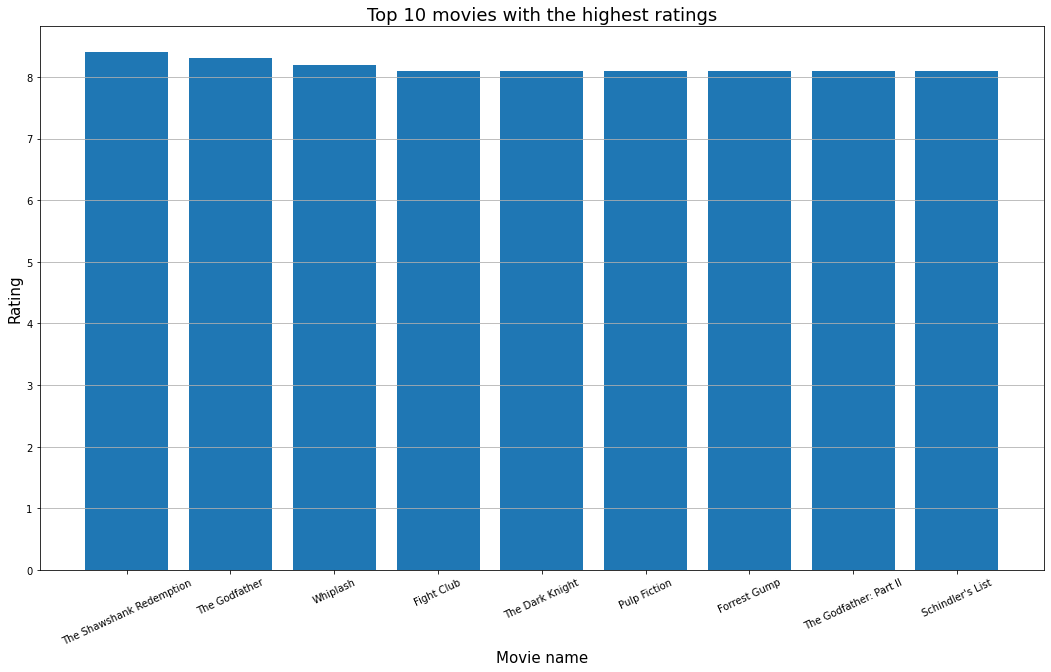

In [24]:
# now we creat visualization
movie_name = df.nlargest(10, 'vote_average').query('vote_count >= 528')['original_title'].values
movie_rating = df.nlargest(10, 'vote_average').query('vote_count >= 528')['vote_average'].values
plt.subplots(figsize=(18, 10))
plt.xticks(rotation=25)
plt.grid(axis='y')
plt.bar(movie_name, movie_rating)
plt.title('Top 10 movies with the highest ratings', fontsize=18)
plt.xlabel('Movie name',fontsize=15)
plt.ylabel('Rating', fontsize=15);

> ### All the top 10 movie ratings are very close to each other but The Shawshank Redemption is the best rating movie with a rating of 8.4

### Research Question 2 (What are the largest years with revenues?)

### calculating the largest years in total revenues

In [25]:
# we will get the largest years
df.groupby('release_year')['revenue'].sum().nlargest(10)

release_year
2015    2.620292e+10
2013    2.435067e+10
2012    2.418446e+10
2014    2.406997e+10
2011    2.340825e+10
2010    2.180436e+10
2009    2.160713e+10
2008    1.896093e+10
2007    1.864067e+10
2004    1.648571e+10
Name: revenue, dtype: float64

### Creating a graph showing us the top years with revenues

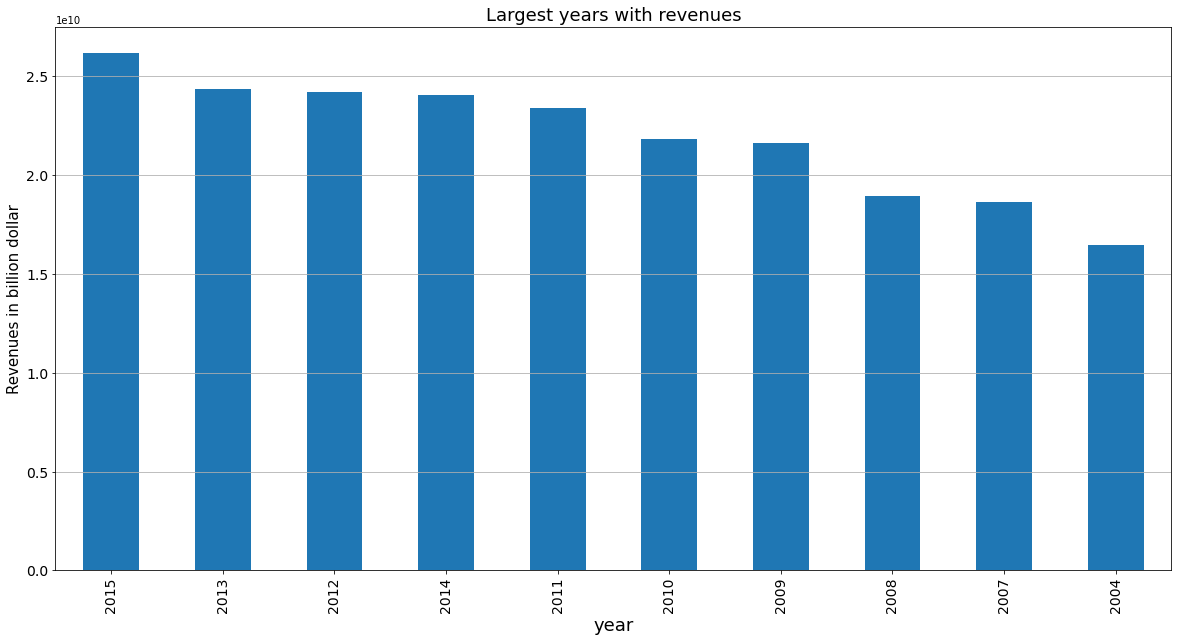

In [26]:
# now we creat visualization
df.groupby('release_year')['revenue'].sum().nlargest(10).plot(kind='bar', fontsize=14, figsize=(20, 10))
plt.grid(axis='y')
plt.title('Largest years with revenues', fontsize=18)
plt.xlabel('year',fontsize=18)
plt.ylabel('Revenues in billion dollar', fontsize=15);

> ### the graph shows that 2015 has the highest revenues in total with 2.620292e+10 dollars

### Research Question 5 (What are the top genres associated with revenues, popularity, budget, and ratings?)
### 1.Top genres associated with revenues

### Getting the most frequent genres associated with revenues

In [27]:
# count of genres
df1 = df.nlargest(100, 'revenue')
genres_revenues = pd.Series(df1['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_revenues

Adventure          73
Action             53
Fantasy            41
Science Fiction    33
Family             33
Animation          21
Thriller           18
Comedy             15
Drama              14
Crime               7
Romance             7
Mystery             5
War                 1
dtype: int64

### Creating visualization about the findings

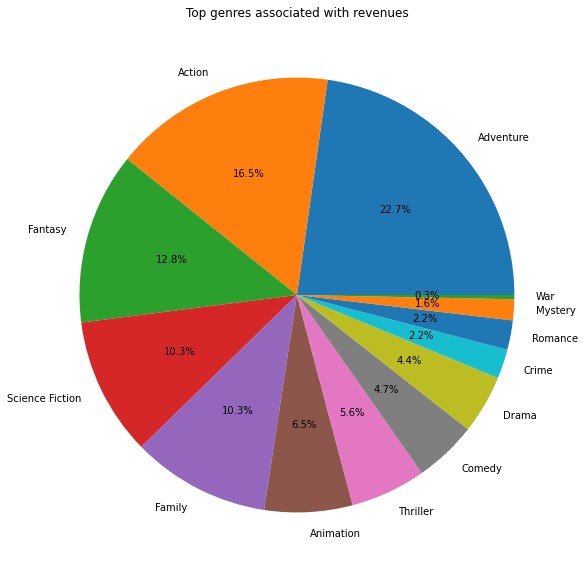

In [30]:
# now we creat visualization
genres_revenues.plot(kind='pie',autopct='%1.1f%%', figsize=(12,10))
plt.title('Top genres associated with revenues')
plt.ylabel('');

> ### We see here that adventure is the most frequent genre associated with revenues with nearly 23%

### 2.Top genres associated with popularity

### Getting the most frequent genres associated with popularity

In [31]:
# count of genres
df2 = df.nlargest(100, 'popularity')
genres_popularity = pd.Series(df2['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_popularity

Action             57
Adventure          56
Science Fiction    41
Thriller           31
Drama              28
Fantasy            28
Family             20
Crime              15
Comedy             13
Mystery             7
Animation           7
War                 4
Western             3
Romance             2
Horror              2
History             1
dtype: int64

### Creating visualization about the findings

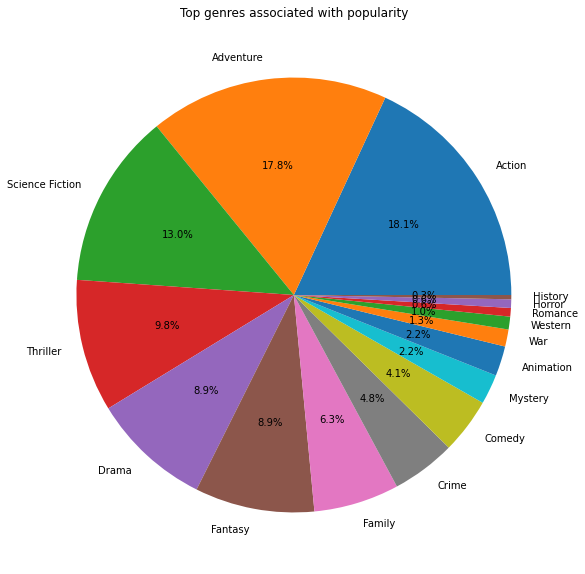

In [32]:
# now we creat visualization
genres_popularity.plot(kind='pie',autopct='%1.1f%%', figsize=(12,10))
plt.title('Top genres associated with popularity')
plt.ylabel('');

> ### looks like the action and adventure genres are very close when it comes to popularity with action has 18.1% and adventure 17.8%

### 3.Top genres associated with budget

### Getting the most frequent genres associated with budget

In [34]:
# count of genres
df3 = df.nlargest(100, 'budget')
genres_budget = pd.Series(df3['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_budget

Adventure          78
Action             68
Science Fiction    39
Fantasy            38
Family             28
Thriller           22
Animation          17
Drama              15
Comedy             13
Crime               6
War                 3
Western             3
Horror              2
Mystery             2
Romance             2
History             1
dtype: int64

### Creating visualization about the findings

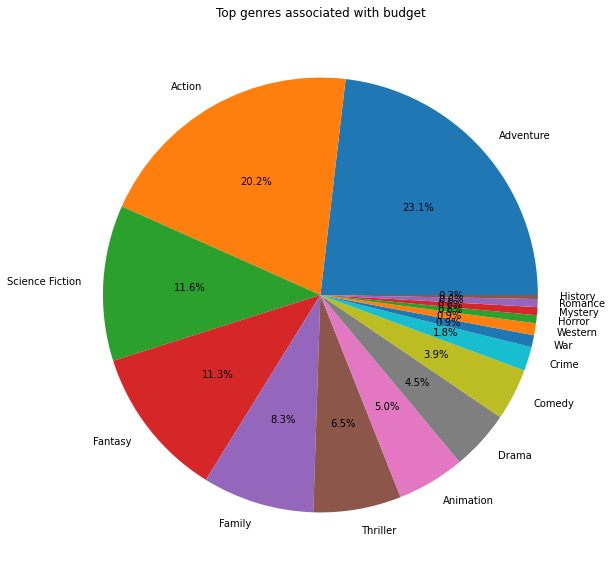

In [35]:
# now we creat visualization
genres_budget.plot(kind='pie',autopct='%1.1f%%', figsize=(12,10))
plt.title('Top genres associated with budget')
plt.ylabel('');

> ### we see that adventure needs more budget to produce than the other genres with 23.1%

### 4.Top genres associated with ratings

### Getting the most frequent genres associated with ratings

In [36]:
# count of genres
df4 = df.nlargest(100, 'vote_average').query('vote_count >= 528')
genres_ratings = pd.Series(df4['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_ratings

Drama              60
Thriller           22
Adventure          21
Action             21
Science Fiction    19
Crime              18
Comedy             11
War                 8
Fantasy             8
Family              7
Romance             7
Mystery             6
History             6
Animation           5
Horror              2
Music               2
Western             1
dtype: int64

### Creating visualization about the findings

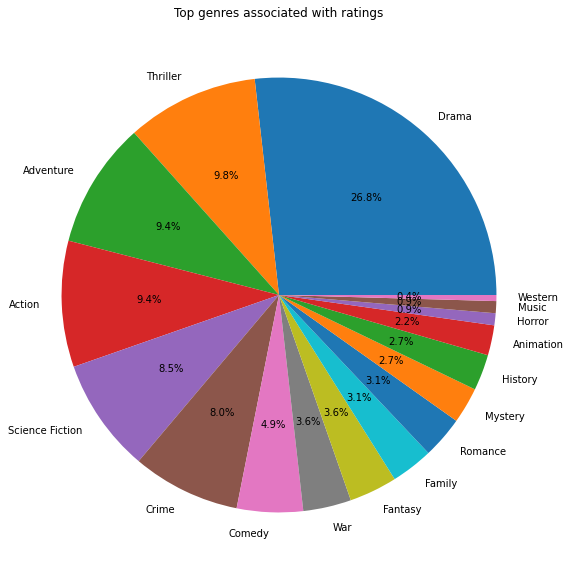

In [37]:
# now we creat visualization
genres_ratings.plot(kind='pie',autopct='%1.1f%%', figsize=(12,10))
plt.title('Top genres associated with ratings')
plt.ylabel('');

> ### seems like drama gets a high ratings by far than the others with 26.8%

### Research Question 4 (What is the average, longest and shortest runtime of a movie?)

### We will calculate the mean of runtime and get the maximum value and the minimum value

In [38]:
# average runtime
df['runtime'].mean()

109.22029060716139

In [39]:
# longest runtime
df['runtime'].max()

338.0

In [40]:
# shortest runtime
df['runtime'].min()

15.0

### Creating histogram shows us the most frequent runtimes

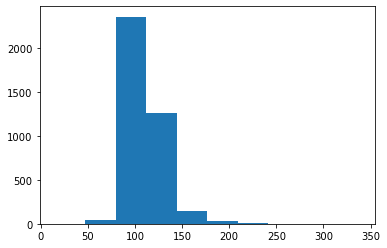

In [41]:
plt.hist(df['runtime']);

> ### we see here that the average runtime of a movie is **109.2** minutes
>
> ### and the longest movie is **338** minutes
>
> ### and the shortest movie is **15** minutes
### Research Question 5 (What kinds of properties are associated with movies that have high revenues?)

### Getting all the data about the top 100 movies associated with high revenues

In [42]:
# top 100 movies with revenues
highest_revenues = df.nlargest(100, 'revenue')
highest_revenues

popularity       budget       revenue                original_title  \
1386    9.432768  237000000.0  2.781506e+09                        Avatar   
3      11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
5231    4.355219  200000000.0  1.845034e+09                       Titanic   
4361    7.637767  220000000.0  1.519558e+09                  The Avengers   
0      32.985763  150000000.0  1.513529e+09                Jurassic World   
...          ...          ...           ...                           ...   
4381    2.592896  225000000.0  6.240268e+08                Men in Black 3   
1920    5.704860  200000000.0  6.239333e+08                    Iron Man 2   
7389    2.764535  150000000.0  6.237228e+08                   Ratatouille   
629    24.949134  165000000.0  6.217525e+08                  Interstellar   
7073    0.672946   30000000.0  6.118994e+08     The Passion of the Christ   

      runtime                                     genres  vote_count  \
1386    162.0   Action|Adventure|Fantasy|Science Fiction        8458   
3       136.0   Action|Adventure|Science Fiction|Fantasy        5292   
5231    194.0                     Drama|Romance|Thriller        4654   
4361    143.0           Science Fiction|Action|Adventure        8903   
0       124.0  Action|Adventure|Science Fiction|Thriller        5562   
...       ...                                        ...         ...   
4381    106.0              Action|Comedy|Science Fiction        3142   
1920    124.0           Adventure|Action|Science Fiction        4920   
7389    111.0            Animation|Comedy|Family|Fantasy        2434   
629     169.0            Adventure|Drama|Science Fiction        6498   
7073    127.0                                      Drama         457   

      vote_average  release_year  
1386           7.1          2009  
3              7.5          2015  
5231           7.3          1997  
4361           7.3          2012  
0              6.5          2015  
...            ...           ...  
4381           6.1          2012  
1920           6.6          2010  
7389           7.3          2007  
629            8.0          2014  
7073           6.8          2004  

[100 rows x 9 columns]

### now let's see some statistics and histograms to know more about the data 

In [43]:
# statistics about the top 100 movies with revenues
highest_revenues.describe()

popularity        budget       revenue     runtime   vote_count  \
count  100.000000  1.000000e+02  1.000000e+02  100.000000   100.000000   
mean     5.191795  1.542350e+08  8.979584e+08  130.070000  3475.060000   
std      4.467371  6.694002e+07  3.189943e+08   25.168625  1839.603382   
min      0.436803  1.050000e+07  6.118994e+08   88.000000   201.000000   
25%      2.755044  1.122500e+08  7.097980e+08  110.250000  2245.750000   
50%      4.264860  1.500000e+08  8.079637e+08  132.000000  3169.500000   
75%      6.067551  2.000000e+08  9.590500e+08  144.250000  4266.000000   
max     32.985763  3.800000e+08  2.781506e+09  201.000000  9767.000000   

       vote_average  release_year  
count    100.000000    100.000000  
mean       6.909000   2007.970000  
std        0.651199      6.817172  
min        5.600000   1977.000000  
25%        6.400000   2004.750000  
50%        6.950000   2010.000000  
75%        7.400000   2013.000000  
max        8.100000   2015.000000

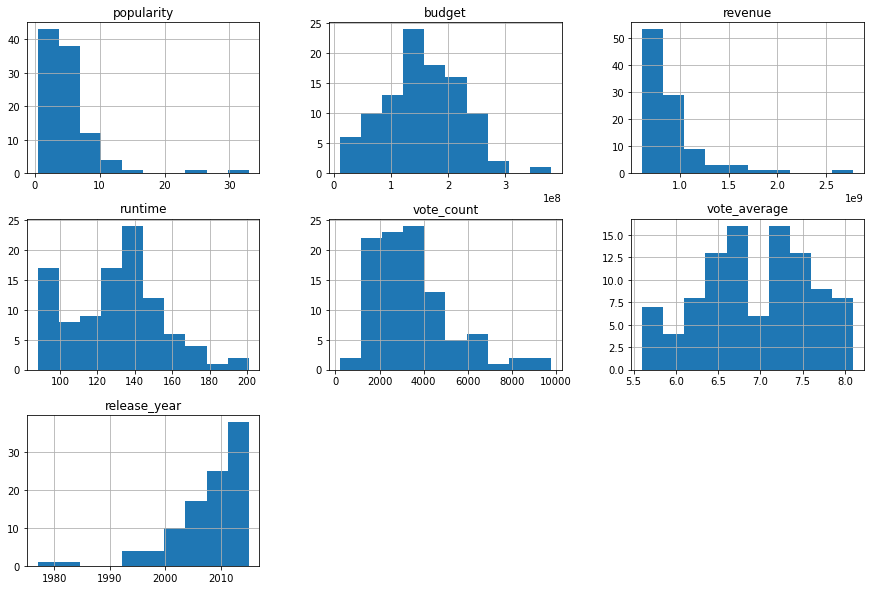

In [44]:
# histograms of the top 100 movies with revenues
highest_revenues.hist(figsize=(15,10));

> ### we see here most of that the highest revenues movies was produced after 2005 and have a rating above 6.9, runtime longer than 110 minutes and more popular than the rest of movies, and have a higher budget

<a id='conclusions'></a>
## Conclusions

> ### After we explored the data and answered our questions we got some conclusions

> <li>Avatar had the highest revenue with 2.781506e+09 dollors, Jurassic World is the most popular movie with popularity of 32.985763, The Shawshank Redemption is the highest rating movie with rating of 8.4</li>
> <li>Recent years is the largest in revenues most of because the inflation</li>
> <li>Adventure, action, fanatsy, and sci-fi genres have the highest revenues,
action, adventure, sci-fi, and thriller are the most popular genres,  
adventure, action, sci-fi, and fantasy genres cost more to make than other genres,
drama, thriller, action, and adventure genres have the highest ratings</li>
> <li>The average runtime of a movie is 109.2 minutes, and the longest movie is 338 minutes, and the shortest movie is 15 minutes and most of movies between 80 and 140 minutes</li>
> </ol>
> <li>Most of the highest revenues movies have a rating above 6.9, runtime longer than 110 minutes and more popular than the rest of movies, and have a higher budget</li>
>
> ### Limitations
> <li>After we cleaned the data from missing values and zero values we dropped many rows so we cant be 100% sure about the results, and revenue and budget values don't have a currency unit so we assumed it in dollars, and the dataset is not up-to-date</li>